In [1]:
%run common.ipy

Using DW in /home/davo/Documents/GRASIA/daostack-notebooks/datawarehouse from date 2023-05-01T00:00:00
DW version 1.1.9
dao-analyzer version: 1.2.6
cache-scripts version: 1.1.9


In [2]:
# Data tools
import pandas as pd
import numpy as np
import datetime as dt

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Jupyter
import ipywidgets as widgets

from dao_analyzer.web.apps.daostack.data_access.daos.metric import srcs as DAOSTACK

sns.set_theme()
sns.set_context('paper')

plt.rcParams['savefig.dpi'] = 600

# Local modules
%load_ext autoreload
%autoreload 1
%aimport utils
%aimport utils.plot

# Resumen

## ¿Cuántas propuestas se han hecho?

In [3]:
dfp = utils.get_df('dfp').reset_index()
print(dfp['network'].value_counts())
print("Total:", len(dfp))

mainnet    2367
xdai       1600
Name: network, dtype: int64
Total: 3967


## ¿Cuánta gente ha propuesto?

In [4]:
print("Total:", dfp['proposer'].nunique())
dfp.groupby('network')['proposer'].nunique()

Total: 633


network
mainnet    533
xdai       148
Name: proposer, dtype: int64

## ¿Cuantos votos hay por propuesta?

In [5]:
dfp.groupby('network')['nvoters'].mean()

network
mainnet    3.084073
xdai       3.818750
Name: nvoters, dtype: float64

## ¿Cuantos usuarios en porcentaje votan en cada propuesta?

In [6]:
dfd = utils.get_df('dfd').reset_index()[['network', 'dao', 'hnusers', 'name']].rename(columns={'name':'daoName'})
_dfp = dfp.merge(dfd, on=['network', 'dao'])
_dfp['nvotersPct'] = _dfp['nvoters'] / _dfp['hnusers'] * 100
_dfp['nvotersPct'].describe()

count    3966.000000
mean        5.269178
std        14.515253
min         0.000000
25%         0.408998
50%         0.995025
75%         3.225806
max       100.000000
Name: nvotersPct, dtype: float64

In [7]:
DEG_MSK = _dfp['executedAt'] < utils.DEGRADATION_DATE
_dfp[DEG_MSK]['nvotersPct'].describe()

count    2336.000000
mean        8.333209
std        18.283262
min         0.000000
25%         0.497512
50%         2.238806
75%         8.000000
max       100.000000
Name: nvotersPct, dtype: float64

### En dOrg

In [8]:
_dfp[_dfp['daoName'].isin({'dOrg'}) & DEG_MSK].describe()

stakesFor  stakesAgainst        confidence  \
count      475.0          475.0             475.0   
mean      2.6248       5.351579   26458947.872379   
std    14.710079      16.997039  205567691.566663   
min          0.0            0.0               0.0   
25%          0.0            0.0               0.0   
50%          0.0            0.0               0.0   
75%          0.0            1.0               0.0   
max        200.0          200.0      3000000000.0   

       queuedVoteRequiredPercentage      queuedVotePeriodLimit  \
count                         475.0                        475   
mean                           50.0  6 days 20:49:34.736842105   
std                             0.0  0 days 22:51:39.187860219   
min                            50.0            0 days 00:30:00   
25%                            50.0            7 days 00:00:00   
50%                            50.0            7 days 00:00:00   
75%                            50.0            7 days 00:00:00   
max                            50.0            7 days 00:00:00   

      boostedVotePeriodLimit  thresholdConst  minimumDaoBounty  \
count                    475           475.0             475.0   
mean         1 days 12:00:00         1.33608           4.87579   
std          0 days 00:00:00        0.120052          14.43914   
min          1 days 12:00:00        1.319414               0.0   
25%          1 days 12:00:00        1.319414               0.0   
50%          1 days 12:00:00        1.319414               0.0   
75%          1 days 12:00:00        1.319414               1.0   
max          1 days 12:00:00        2.199023              50.0   

       daoBountyConst     nvoters  daostake    nstakers  internalDAO  \
count           475.0  475.000000     475.0  475.000000   475.000000   
mean         9.033684    2.898947   4.87579    0.252632     0.181053   
std          9.955329    1.591876  14.43914    0.458589     0.417015   
min               1.0    0.000000       0.0    0.000000     0.000000   
25%              10.0    2.000000       0.0    0.000000     0.000000   
50%              10.0    2.000000       0.0    0.000000     0.000000   
75%              10.0    4.000000       1.0    0.000000     0.000000   
max              75.0    8.000000      50.0    2.000000     2.000000   

       isProposer     hnusers  nvotersPct  
count  113.000000  475.000000  475.000000  
mean     0.424779   26.187368   11.311153  
std      0.563872    2.869277    6.546472  
min      0.000000   22.000000    0.000000  
25%      0.000000   25.000000    8.000000  
50%      0.000000   25.000000    8.000000  
75%      1.000000   25.000000   16.000000  
max      2.000000   31.000000   36.363636

### En dxDAO

In [9]:
_dfp[_dfp['daoName'].isin({'dxDAO', 'xDXdao'}) & DEG_MSK].describe()

stakesFor  stakesAgainst  confidence  queuedVoteRequiredPercentage  \
count        755.0          755.0       755.0                         755.0   
mean   1197.235483     368.445947    4.614098                          50.0   
std    1269.232006    1088.141276    3.890467                           0.0   
min            0.0           50.0         0.0                          50.0   
25%          360.0          200.0         1.8                          50.0   
50%         1000.0          250.0         4.0                          50.0   
75%         1648.5          250.0       6.325                          50.0   
max        12950.0       20750.51      39.868                          50.0   

            queuedVotePeriodLimit     boostedVotePeriodLimit  thresholdConst  \
count                         755                        755           755.0   
mean   38 days 08:38:46.887417218  5 days 23:50:27.814569536        1.328443   
std    18 days 06:23:53.696039942  2 days 17:26:59.607610605        0.038596   
min               7 days 00:00:00            1 days 12:00:00        1.319414   
25%              30 days 00:00:00            4 days 00:00:00        1.319414   
50%              45 days 00:00:00            7 days 00:00:00        1.319414   
75%              45 days 00:00:00            7 days 00:00:00        1.319414   
max              90 days 00:00:00           14 days 00:00:00        1.649267   

       minimumDaoBounty  daoBountyConst     nvoters    daostake    nstakers  \
count             755.0           755.0  755.000000       755.0  755.000000   
mean         245.562914            10.0    3.864901  245.565152    1.264901   
std          147.762426             0.0    4.274441  147.762499    0.848637   
min                50.0            10.0    0.000000        50.0    0.000000   
25%               200.0            10.0    1.000000       200.0    1.000000   
50%               250.0            10.0    2.000000       250.0    1.000000   
75%               250.0            10.0    5.000000       250.0    2.000000   
max              1000.0            10.0   25.000000      1000.0    7.000000   

       internalDAO  isProposer     hnusers  nvotersPct  
count   755.000000  628.000000  755.000000  755.000000  
mean      1.054305    0.369427  466.529801    0.842598  
std       0.834258    0.539202   38.104075    0.962384  
min       0.000000    0.000000  402.000000    0.000000  
25%       1.000000    0.000000  402.000000    0.204499  
50%       1.000000    0.000000  489.000000    0.497512  
75%       1.000000    1.000000  489.000000    1.022495  
max       6.000000    3.000000  489.000000    5.721393

## Cantidad de propuestas de cada tipo

              precision    recall  f1-score   support

       False       0.55      0.90      0.69       582
        True       0.98      0.87      0.92      3220

    accuracy                           0.87      3802
   macro avg       0.77      0.89      0.80      3802
weighted avg       0.91      0.87      0.88      3802

Total: 3802
saving to ../logseq/assets/nb_figures/proposals/number_proposals_type_nonetwork.png
Figure is Axes
Use ![Número de propuestas de cada tipo](../assets/nb_figures/proposals/number_proposals_type_nonetwork.png) to embed it in logseq


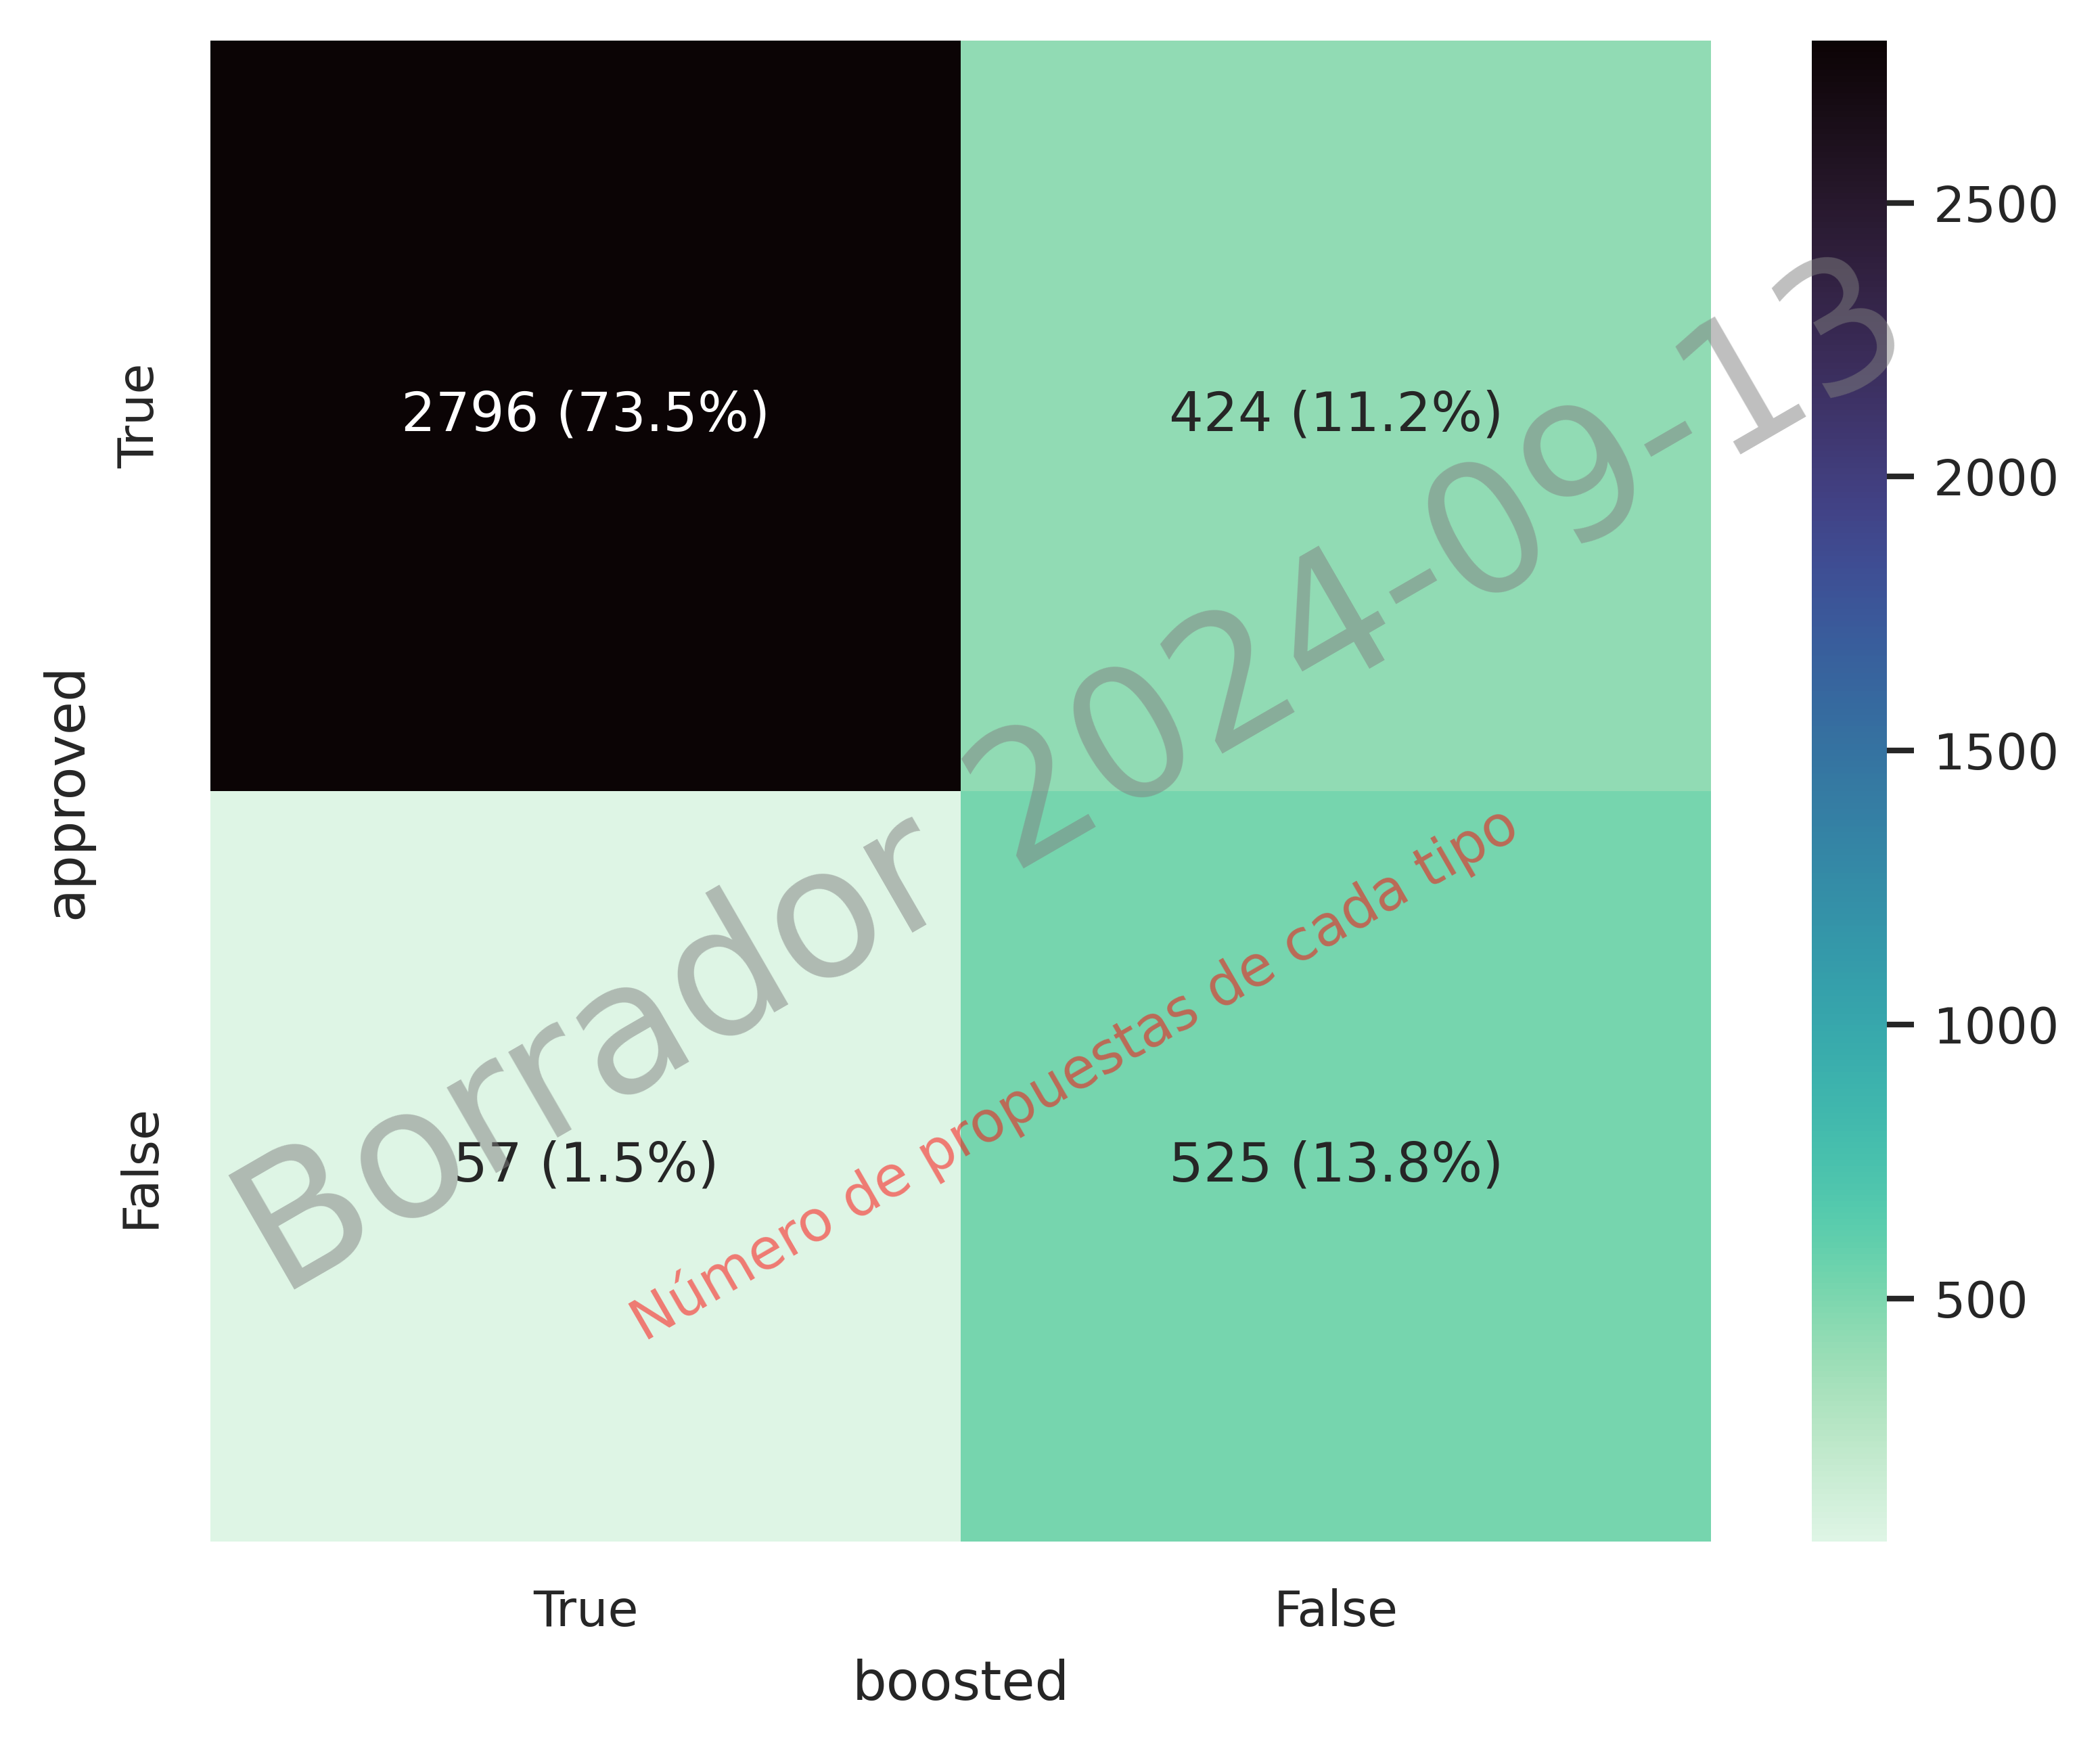

In [10]:
dfpr = utils.get_df('dfpr')
print(classification_report(y_true=dfpr['approved'], y_pred=dfpr['boosted'], zero_division=0))
ct = pd.crosstab(dfpr['approved'], dfpr['boosted']).sort_index(ascending=False).sort_index(axis=1, ascending=False)
total = ct.sum().sum()
print("Total:", total)
labels = ct.applymap(lambda x: f'{x} ({x/total*100:.1f}%)')
fig = sns.heatmap(ct, annot=labels, fmt='', square=True, cmap=utils.plot.default_heatmap_cmap)
fig.set_title('Número de propuestas de cada tipo')
utils.plot.save_fig(fig, 'proposals/number_proposals_type_nonetwork.png', debug=True)

### Sin contar dxDAO

Classification report: dxDAO == True
              precision    recall  f1-score   support

       False       0.47      0.92      0.62       390
        True       0.96      0.63      0.76      1095

    accuracy                           0.71      1485
   macro avg       0.71      0.78      0.69      1485
weighted avg       0.83      0.71      0.72      1485

boosted
True     int64
False    int64
dtype: object
Classification report: dxDAO == True
              precision    recall  f1-score   support

       False       0.89      0.86      0.88       192
        True       0.99      0.99      0.99      2125

    accuracy                           0.98      2317
   macro avg       0.94      0.93      0.93      2317
weighted avg       0.98      0.98      0.98      2317

boosted
True     int64
False    int64
dtype: object
saving to ../logseq/assets/nb_figures/proposals/number_proposals_type_dxDAO.png
Figure is Figure
Use ![Número de propuestas de cada tipo sin contar dxDAO](../assets/nb_

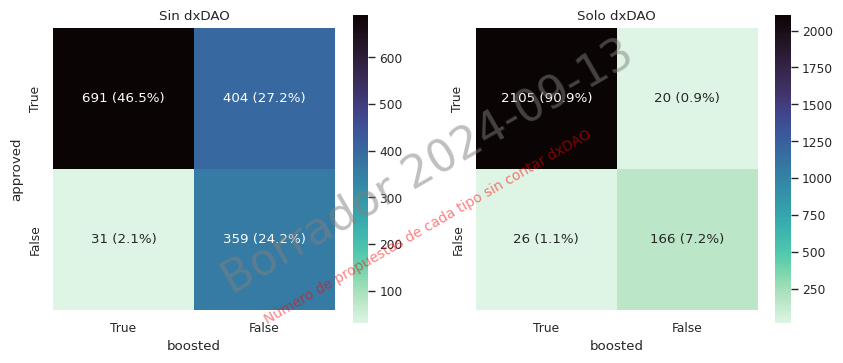

In [11]:
dfpr = utils.get_df('dfpr')

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
fig.suptitle("Número de propuestas de cada tipo sin contar dxDAO")
# fig.supxlabel("Red")

for i, b in enumerate([False, True]):
    dfprn = dfpr[(dfpr['group'] == 'dxDAO') == b]
    
    print(f'Classification report: dxDAO == True')
    print(classification_report(y_true=dfprn['approved'], y_pred=dfprn['boosted'], zero_division=0))
    
    ct = pd.crosstab(dfprn['approved'], dfprn['boosted']).sort_index(ascending=False).sort_index(axis=1, ascending=False)
    print(ct.dtypes)
    total = ct.sum().sum()
    
    labels = ct.applymap(lambda x: f'{x} ({x/total*100:.1f}%)')
    sns.heatmap(ct, annot=labels, fmt='', ax=axs[i], square=True, cmap=utils.plot.default_heatmap_cmap)
    axs[i].set_title('Solo dxDAO' if b else 'Sin dxDAO')
    
    if i != 0:
        axs[i].set_ylabel("")
        
utils.plot.save_fig(fig, 'proposals/number_proposals_type_dxDAO.png', show_title=False)

### Por red

Classification report mainnet
              precision    recall  f1-score   support

       False       0.52      0.91      0.66       469
        True       0.97      0.79      0.87      1874

    accuracy                           0.81      2343
   macro avg       0.75      0.85      0.77      2343
weighted avg       0.88      0.81      0.83      2343

boosted
True     int64
False    int64
dtype: object
Classification report xdai
              precision    recall  f1-score   support

       False       0.76      0.85      0.80       113
        True       0.99      0.98      0.98      1346

    accuracy                           0.97      1459
   macro avg       0.87      0.91      0.89      1459
weighted avg       0.97      0.97      0.97      1459

boosted
True     int64
False    int64
dtype: object
saving to ../logseq/assets/nb_figures/proposals/number_proposals_type.png
Figure is Figure
Use ![Número de propuestas de cada tipo por red](../assets/nb_figures/proposals/number_proposa

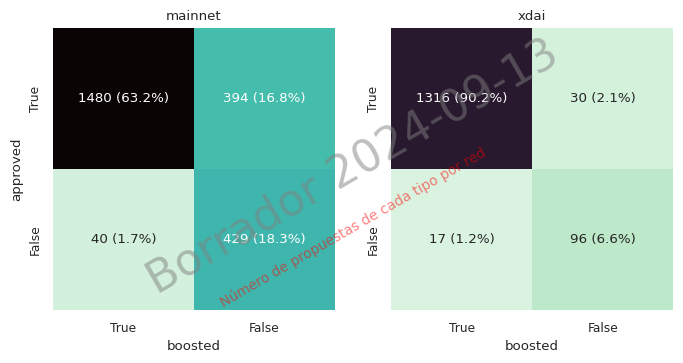

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8,4))
fig.suptitle("Número de propuestas de cada tipo por red")
# fig.supxlabel("Red")

kwargs = dict(
    vmin = 0,
    vmax = 1480,
    cbar = False,
    cmap = utils.plot.default_heatmap_cmap,
)
for i, n in enumerate(['mainnet', 'xdai']):    
    dfprn = dfpr[dfpr['network'] == n]
    
    print("Classification report", n)
    print(classification_report(y_true=dfprn['approved'], y_pred=dfprn['boosted'], zero_division=0))
    
    ct = pd.crosstab(dfprn['approved'], dfprn['boosted']).sort_index(ascending=False).sort_index(axis=1, ascending=False)
    print(ct.dtypes)
    total = ct.sum().sum()
    
    labels = ct.applymap(lambda x: f'{x} ({x/total*100:.1f}%)')
    sns.heatmap(ct, annot=labels, fmt='', ax=axs[i], square=True, **kwargs)
    axs[i].set_title(n)
    
    if i != 0:
        axs[i].set_ylabel("")
        
utils.plot.save_fig(fig, 'proposals/number_proposals_type.png')

### Pre Jun '21

In [13]:
dfpr['executedAt'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3797    False
3798    False
3799    False
3800    False
3801    False
Name: executedAt, Length: 3802, dtype: bool

## Figura 2 del Paper

              precision    recall  f1-score   support

       False       0.52      0.93      0.67       496
        True       0.97      0.76      0.85      1717

    accuracy                           0.80      2213
   macro avg       0.75      0.84      0.76      2213
weighted avg       0.87      0.80      0.81      2213

Total: 2213
saving to ../logseq/assets/nb_figures/proposals/number_proposals_type_nonetwork_predate.png
Figure is Axes
Use ![Número de propuestas de cada tipo pre 2021-06-01 00:00:00](../assets/nb_figures/proposals/number_proposals_type_nonetwork_predate.png) to embed it in logseq


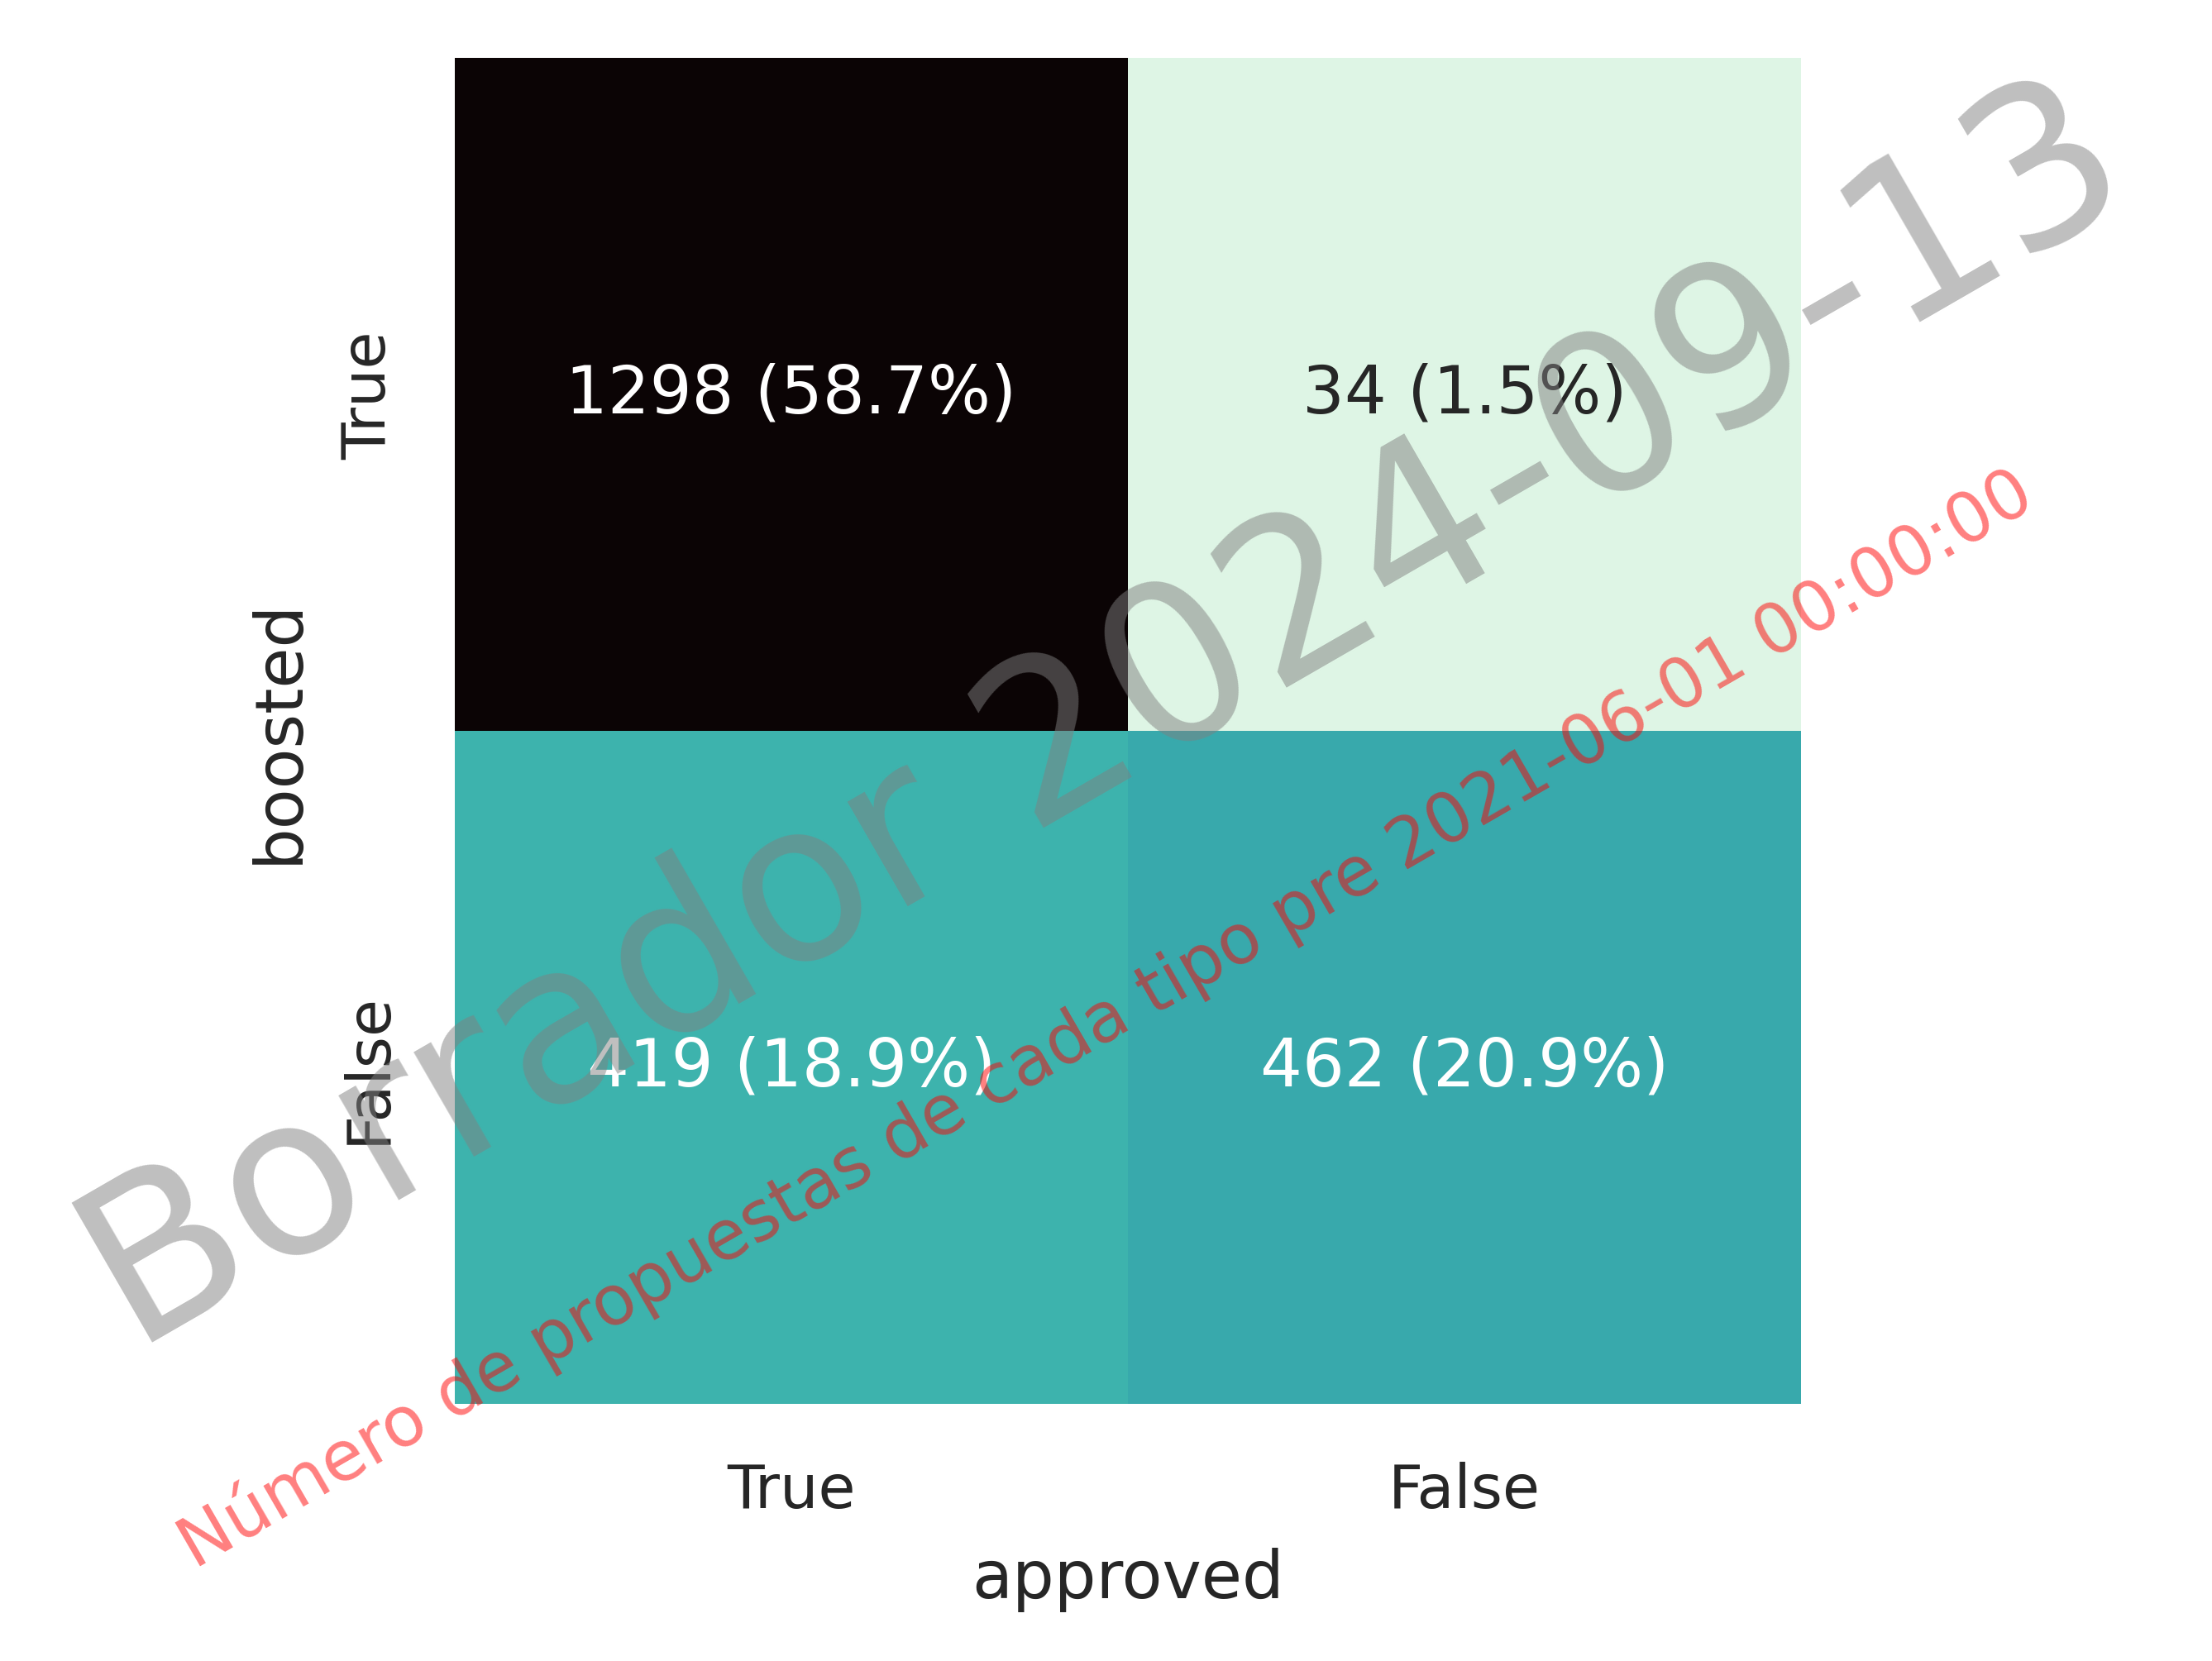

In [14]:
dfpr = utils.get_df('dfpr')

assert not any(dfpr['executedAt'].isna())
assert dt.datetime(2021,5,31, 23, 59) < dt.datetime(2021,6,1)
assert dt.datetime(2021,6,1,0,1) > dt.datetime(2021,6,1)

DATE = utils.DEGRADATION_DATE
dfpr = dfpr[dfpr['executedAt'] < DATE]

print(classification_report(y_true=dfpr['approved'], y_pred=dfpr['boosted'], zero_division=0))
ct = pd.crosstab(dfpr['boosted'], dfpr['approved']).sort_index(ascending=False).sort_index(axis=1, ascending=False)
total = ct.sum().sum()
print("Total:", total)
labels = ct.applymap(lambda x: f'{x} ({x/total*100:.1f}%)')

plt.figure(figsize=(3.5, 4))

fig = sns.heatmap(ct, annot=labels, fmt='', square=True, cmap=utils.plot.default_heatmap_cmap, cbar=False)
fig.set_title(f'Número de propuestas de cada tipo pre {DATE}')
utils.plot.save_fig(fig, 'proposals/number_proposals_type_nonetwork_predate.png', debug=True)

              precision    recall  f1-score   support

       False       0.52      0.93      0.67       496
        True       0.97      0.76      0.85      1717

    accuracy                           0.80      2213
   macro avg       0.75      0.84      0.76      2213
weighted avg       0.87      0.80      0.81      2213

Total: 2213


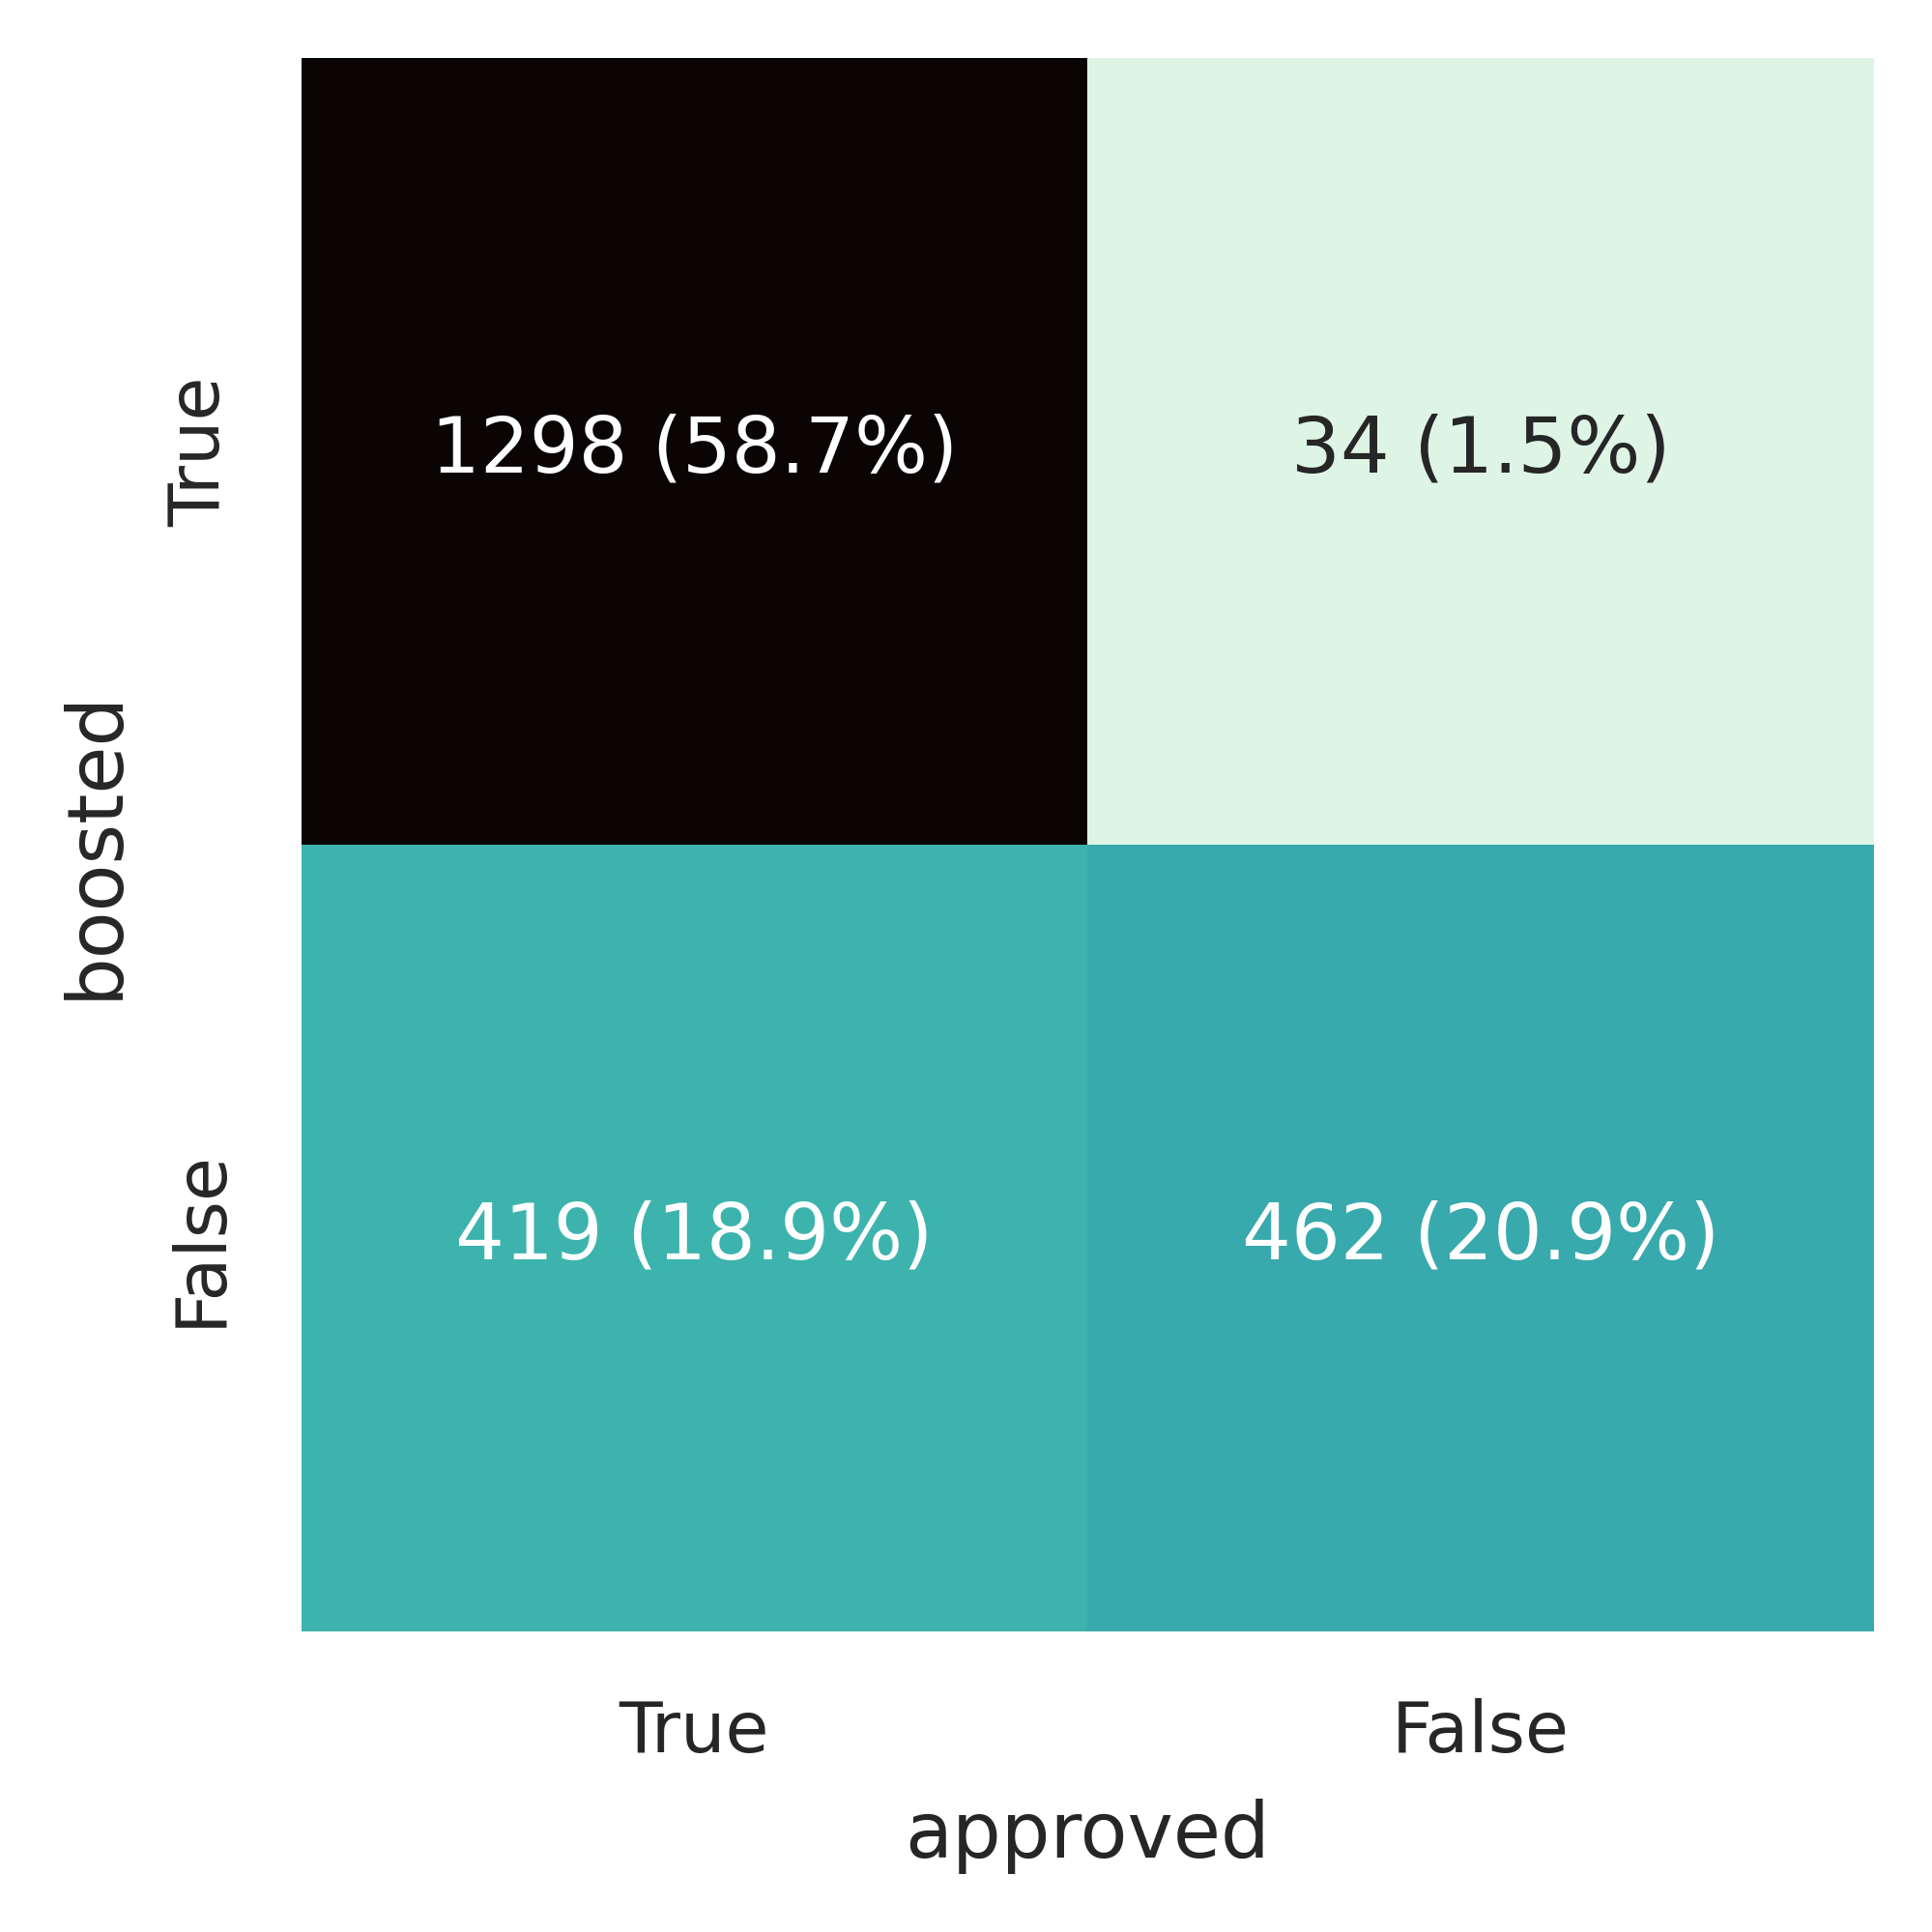

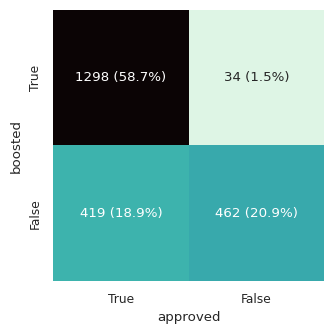

In [15]:
from IPython.display import Image, SVG

dfpr = utils.get_df('dfpr')

assert not any(dfpr['executedAt'].isna())
assert dt.datetime(2021,5,31, 23, 59) < dt.datetime(2021,6,1)
assert dt.datetime(2021,6,1,0,1) > dt.datetime(2021,6,1)

DATE = utils.DEGRADATION_DATE
dfpr = dfpr[dfpr['executedAt'] < DATE]

print(classification_report(y_true=dfpr['approved'], y_pred=dfpr['boosted'], zero_division=0))
ct = pd.crosstab(dfpr['boosted'], dfpr['approved']).sort_index(ascending=False).sort_index(axis=1, ascending=False)
total = ct.sum().sum()
print("Total:", total)
labels = ct.applymap(lambda x: f'{x} ({x/total*100:.1f}%)')

plt.figure(figsize=(3.5, 4))

fig = sns.heatmap(ct, annot=labels, fmt='', square=True, cmap=utils.plot.default_heatmap_cmap, cbar=False)

# plt.tight_layout(rect=(0,0,0.85,1))
for ext in ['png', 'svg', 'pdf']:
    plt.savefig('../logseq/assets/nb_figures/proposals/number_proposals_type_nonetwork_predate_final.'+ext, bbox_inches='tight')
Image('../logseq/assets/nb_figures/proposals/number_proposals_type_nonetwork_predate_final.png')

### Actualización de la figura para mejor explicabilidad

Siguiendo los estándares de «Designing Alternative Representations of Confusion Matrices to Support Non-Expert Public Understanding of Algorithm Performance»

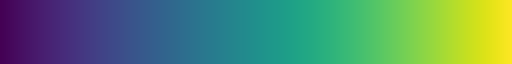

   approved      boosted  count       pct
0  Approved      Boosted   1298  0.586534
1  Rejected  Non-boosted    462  0.208766
2  Approved  Non-boosted    419  0.189336
3  Rejected      Boosted     34  0.015364
Total: 2213 max: 1298


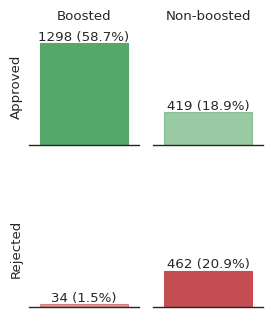

In [16]:
# _cmap = sns.color_palette(utils.plot.default_heatmap_cmap, as_cmap=True)
_cmap = sns.color_palette("viridis", as_cmap=True)
display(_cmap)

_toplot = dfpr[['approved', 'boosted']].value_counts().rename('count').reset_index().copy()
_toplot['boosted'] = np.where(_toplot['boosted'], 'Boosted', 'Non-boosted')
_toplot['approved'] = np.where(_toplot['approved'], 'Approved', 'Rejected')

_total = _toplot['count'].sum()
_max = _toplot['count'].max()
_toplot['pct'] = _toplot['count'] / _total
print(_toplot)
print("Total:", _total, "max:", _max)

with sns.axes_style("white"):
    # Get the color map
    # https://stackoverflow.com/a/38575399/4505998
    g = sns.catplot(
        data=_toplot, y='count', col='boosted', row='approved',
        kind='bar', height=1.7, margin_titles=True,
    )

g.set(
    # Set the ylim to the 100%, so the boxes become percentages
    # ylim=(0,_total),
    ylim=(0,1500),
    # Remove left ticks (redundant)
    yticks=[],
)

# Setting the titles
for ax,l in zip(g.axes[:,0],g.row_names):
    ax.set_ylabel(l)
g.set_titles(col_template="{col_name}", row_template="")

# Making it more beautiful
g.despine(left=True)

colors = [
    ('C2', 1), ('C2', .6),
    ('C3', .6), ('C3', 1),
]
for i, ax in enumerate(g.axes.ravel()):
    # Setting the bar labels
    # Display the number and percentage of proposals in each class
    for c in ax.containers:
        labels = [f'{v.get_height():.0f} ({v.get_height()/_total*100:.1f}%)' for v in c]
        ax.bar_label(c, labels=labels)

        # Set the color of each bar to a colormap
        for b in c:
            # plt.setp(b, color=_cmap(b.get_height() / _max))
            # plt.setp(b, color=_cmap(b.get_height() / _total))
            plt.setp(b, color=colors[i][0], alpha=colors[i][1])

for ext in ['png', 'svg', 'pdf']:
    plt.savefig('../logseq/assets/nb_figures/proposals/number_proposals_type_nonetwork_predate_final_v2.'+ext, bbox_inches='tight')

## ¿Que cantidad de propuestas tuvieron más VP a favor que en contra?

In [17]:
print(dfpr.columns)
dfpr['majority'] = np.sign(dfpr['votesFor'] - dfpr['votesAgainst']).astype(int)
dfpr['majorityMin'] = (dfpr['votesFor'] > dfpr['votesAgainst'])
dfpr.groupby(['boosted', 'approved'])[['majority', 'majorityMin']].mean()

Index(['network', 'id', 'proposer', 'stage', 'createdAt', 'preBoostedAt',
       'boostedAt', 'quietEndingPeriodBeganAt', 'closingAt',
       'preBoostedClosingAt', 'executedAt', 'totalRepWhenExecuted',
       'totalRepWhenCreated', 'executionState', 'expiresInQueueAt', 'votesFor',
       'votesAgainst', 'winningOutcome', 'stakesFor', 'stakesAgainst', 'title',
       'description', 'url', 'confidence', 'confidenceThreshold',
       'queuedVoteRequiredPercentage', 'queuedVotePeriodLimit',
       'boostedVotePeriodLimit', 'thresholdConst', 'minimumDaoBounty',
       'daoBountyConst', 'dao', 'competitionId', 'name', 'group',
       'originalName', 'votesForPct', 'votesAgainstPct', 'executedAtMonth',
       'createdAtMonth', 'daoRegister', 'nvoters', 'daostake', 'nstakers',
       'internalDAO', 'isProposer', 'stakes', 'boosted', 'approved'],
      dtype='object')


majority  majorityMin
boosted approved                       
False   False    -0.259740     0.168831
        True      1.000000     1.000000
True    False    -0.823529     0.000000
        True      1.000000     1.000000

## Las propuestas pos Jun '21

In [18]:
dfpr.columns

Index(['network', 'id', 'proposer', 'stage', 'createdAt', 'preBoostedAt',
       'boostedAt', 'quietEndingPeriodBeganAt', 'closingAt',
       'preBoostedClosingAt', 'executedAt', 'totalRepWhenExecuted',
       'totalRepWhenCreated', 'executionState', 'expiresInQueueAt', 'votesFor',
       'votesAgainst', 'winningOutcome', 'stakesFor', 'stakesAgainst', 'title',
       'description', 'url', 'confidence', 'confidenceThreshold',
       'queuedVoteRequiredPercentage', 'queuedVotePeriodLimit',
       'boostedVotePeriodLimit', 'thresholdConst', 'minimumDaoBounty',
       'daoBountyConst', 'dao', 'competitionId', 'name', 'group',
       'originalName', 'votesForPct', 'votesAgainstPct', 'executedAtMonth',
       'createdAtMonth', 'daoRegister', 'nvoters', 'daostake', 'nstakers',
       'internalDAO', 'isProposer', 'stakes', 'boosted', 'approved',
       'majority', 'majorityMin'],
      dtype='object')

In [19]:
dfpr = utils.get_df('dfpr')
dfpr['when'] = np.where(dfpr['executedAt'] < DATE, 'pre', 'pos')
# dfpr['internalDAOrel'] = dfpr['internalDAO'] / dfpr['nstakers']
dfpr['hasStakes'] = (dfpr['nstakers'] >= 1).astype(int)
dfpr['hasInternalDAO'] = (dfpr['internalDAO'] >= 1).astype(int)
dfpr['stakedByCreator'] = (dfpr['isProposer'] >= 1).astype(int)
dfpr.drop(columns=[
    'queuedVoteRequiredPercentage', 'queuedVotePeriodLimit', 'boostedVotePeriodLimit', 'thresholdConst', 'minimumDaoBounty',
    'daoBountyConst', 'confidence', 'internalDAO', 'stakesAgainst', 'daostake',
]).groupby('when').describe().transpose()

when                           pos          pre
stakesFor       count       1589.0       2213.0
                mean   1028.609163   629.109953
                std    1015.253837  1008.942532
                min            0.0          0.0
                25%          450.0          0.0
                50%          800.0        250.0
                75%         1300.0       1000.0
                max        16000.0      12950.0
nvoters         count       1589.0       2213.0
                mean      3.509125      3.44826
                std       3.389226      3.58148
                min            0.0          0.0
                25%            1.0          1.0
                50%            3.0          2.0
                75%            5.0          5.0
                max           37.0         38.0
nstakers        count       1589.0       2213.0
                mean      1.244179     1.167646
                std        0.55393     1.256593
                min            0.0          0.0
                25%            1.0          0.0
                50%            1.0          1.0
                75%            1.0          2.0
                max            4.0         15.0
isProposer      count       1222.0       1439.0
                mean      0.579378     0.409312
                std        0.54585     0.650193
                min            0.0          0.0
                25%            0.0          0.0
                50%            1.0          0.0
                75%            1.0          1.0
                max            3.0          6.0
hasStakes       count       1589.0       2213.0
                mean      0.970422     0.679169
                std       0.169474     0.466902
                min            0.0          0.0
                25%            1.0          0.0
                50%            1.0          1.0
                75%            1.0          1.0
                max            1.0          1.0
hasInternalDAO  count       1589.0       2213.0
                mean      0.751416     0.587438
                std       0.432328     0.492407
                min            0.0          0.0
                25%            1.0          0.0
                50%            1.0          1.0
                75%            1.0          1.0
                max            1.0          1.0
stakedByCreator count       1589.0       2213.0
                mean      0.425425     0.224582
                std       0.494563     0.417401
                min            0.0          0.0
                25%            0.0          0.0
                50%            0.0          0.0
                75%            1.0          0.0
                max            1.0          1.0

### ¿Cuantas propuestas pre-cutoff no tenían ningún self-stake?

In [20]:
n_props = len(dfpr)
n_no_internal = n_props - dfpr['hasInternalDAO'].sum()
print(f"Of the {n_props}, {n_no_internal} ({n_no_internal/n_props*100:.2f}%) had no stakes from inside the DAO")

Of the 3802, 1308 (34.40%) had no stakes from inside the DAO


### ¿Cuantas propuestas pre-cutoff fueron stakeadas por quien las propuso?

In [21]:
n_props = len(dfpr)
n_creator = dfpr['stakedByCreator'].sum()
print(f"Of the {n_props}, {n_creator} ({n_creator/n_props*100:.2f}%) were staked by the creator")

Of the 3802, 1173 (30.85%) were staked by the creator


## Los stakes Pre/Pos Jun' 21

In [22]:
dfs = utils.get_df('dfs')
dfs['when'] = np.where(dfs['createdAt'] < DATE, 'pre', 'pos')
dfs[['internalDAO', 'isProposer']] = dfs[['internalDAO', 'isProposer']].astype(int)
dfs.groupby('when').describe().transpose()

when                        pos           pre
amount      count   1660.000000   3450.000000
            mean     663.348307    336.327431
            std     1079.258166    799.290316
            min   -20000.000000 -20000.000000
            25%      300.000000      1.000000
            50%      500.000000    151.000000
            75%      959.600000    500.000000
            max    10000.000000  11050.000000
internalDAO count   1660.000000   3450.000000
            mean       0.966867      0.834203
            std        0.179037      0.371952
            min        0.000000      0.000000
            25%        1.000000      1.000000
            50%        1.000000      1.000000
            75%        1.000000      1.000000
            max        1.000000      1.000000
isProposer  count   1660.000000   3450.000000
            mean       0.475301      0.263478
            std        0.499540      0.440583
            min        0.000000      0.000000
            25%        0.000000      0.000000
            50%        0.000000      0.000000
            75%        1.000000      1.000000
            max        1.000000      1.000000

## Cantidad media stakeada por tipo

Index(['network', 'id', 'proposer', 'stage', 'createdAt', 'preBoostedAt',
       'boostedAt', 'quietEndingPeriodBeganAt', 'closingAt',
       'preBoostedClosingAt', 'executedAt', 'totalRepWhenExecuted',
       'totalRepWhenCreated', 'executionState', 'expiresInQueueAt', 'votesFor',
       'votesAgainst', 'winningOutcome', 'stakesFor', 'stakesAgainst', 'title',
       'description', 'url', 'confidence', 'confidenceThreshold',
       'queuedVoteRequiredPercentage', 'queuedVotePeriodLimit',
       'boostedVotePeriodLimit', 'thresholdConst', 'minimumDaoBounty',
       'daoBountyConst', 'dao', 'competitionId', 'name', 'group',
       'originalName', 'votesForPct', 'votesAgainstPct', 'executedAtMonth',
       'createdAtMonth', 'daoRegister', 'nvoters', 'daostake', 'nstakers',
       'internalDAO', 'isProposer', 'stakes', 'boosted', 'approved', 'upstake',
       'downstake', 'genMovilized'],
      dtype='object')


array([['\\textbf{927.62}\n 920.68\n6.94', '\\textbf{6.19}\n 6.19\n0.00'],
       ['\\textbf{619.20}\n 579.35\n39.85',
        '\\textbf{727.95}\n 260.50\n467.45']], dtype='<U30')

array([['\\textbf{1128.91}\n 1127.84\n1.06',
        '\\textbf{527.40}\n 527.40\n0.00'],
       ['\\textbf{1183.65}\n 1141.89\n41.76',
        '\\textbf{186.09}\n 75.23\n110.85']], dtype='<U31')

saving to ../logseq/assets/nb_figures/proposals/average_staking.png
Figure is Figure
Use ![Cantidad media de GEN stakeada en cada propuesta por red y tipo](../assets/nb_figures/proposals/average_staking.png) to embed it in logseq


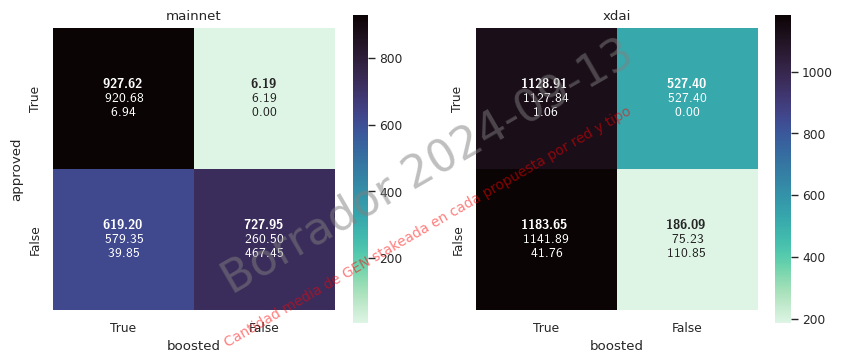

In [23]:
dfpr = utils.get_df('dfpr')
dfpr['upstake'] = dfpr['stakesFor']
dfpr['downstake'] = dfpr['stakesAgainst'] - dfpr['daostake']
dfpr['genMovilized'] = dfpr['stakesFor'] + dfpr['stakesAgainst'] - dfpr['daostake']
assert (dfpr['genMovilized'] >= 0).all()

# display(dfpr)
print(dfpr.columns)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
fig.suptitle("Cantidad media de GEN stakeada en cada propuesta por red y tipo")
# fig.supxlabel("Red")

for i, n in enumerate(['mainnet', 'xdai']):    
    dfprn = dfpr[dfpr['network'] == n]
    
    ct = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['genMovilized'], aggfunc='mean').sort_index(ascending=False).sort_index(axis=1, ascending=False)
    ctup = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['upstake'], aggfunc='mean').sort_index(ascending=False).sort_index(axis=1, ascending=False).to_numpy()
    ctdown = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['downstake'], aggfunc='mean').sort_index(ascending=False).sort_index(axis=1, ascending=False).to_numpy()
    # Hay que convertirlo a float porque es un Float
    ct = ct.astype(float)
    
    vlabel = np.vectorize(lambda up, down: f'\\textbf{{{up+down:.2f}}}\n {up:.2f}\n{down:.2f}')
        
    display(vlabel(ctup, ctdown))
    # total = ct.sum().sum()
    
    sns.heatmap(ct, 
                annot=vlabel(ctup, ctdown), fmt='', 
                ax=axs[i], 
                square=True, 
                cmap=utils.plot.default_heatmap_cmap, 
                annot_kws={'usetex': True}
               )
    axs[i].set_title(n)
    
    if i != 0:
        axs[i].set_ylabel("")
        
utils.plot.save_fig(fig, 'proposals/average_staking.png')

### Colores divergentes

Index(['network', 'id', 'proposer', 'stage', 'createdAt', 'preBoostedAt',
       'boostedAt', 'quietEndingPeriodBeganAt', 'closingAt',
       'preBoostedClosingAt', 'executedAt', 'totalRepWhenExecuted',
       'totalRepWhenCreated', 'executionState', 'expiresInQueueAt', 'votesFor',
       'votesAgainst', 'winningOutcome', 'stakesFor', 'stakesAgainst', 'title',
       'description', 'url', 'confidence', 'confidenceThreshold',
       'queuedVoteRequiredPercentage', 'queuedVotePeriodLimit',
       'boostedVotePeriodLimit', 'thresholdConst', 'minimumDaoBounty',
       'daoBountyConst', 'dao', 'competitionId', 'name', 'group',
       'originalName', 'votesForPct', 'votesAgainstPct', 'executedAtMonth',
       'createdAtMonth', 'daoRegister', 'nvoters', 'daostake', 'nstakers',
       'internalDAO', 'isProposer', 'stakes', 'boosted', 'approved', 'upstake',
       'downstake', 'genMovilized'],
      dtype='object')


array([['\\textbf{927.62}\n 920.68\n6.94', '\\textbf{6.19}\n 6.19\n0.00'],
       ['\\textbf{619.20}\n 579.35\n39.85',
        '\\textbf{727.95}\n 260.50\n467.45']], dtype='<U30')

array([[ 0.98503879,  1.        ],
       [ 0.87128605, -0.28428689]])

array([['\\textbf{1128.91}\n 1127.84\n1.06',
        '\\textbf{527.40}\n 527.40\n0.00'],
       ['\\textbf{1183.65}\n 1141.89\n41.76',
        '\\textbf{186.09}\n 75.23\n110.85']], dtype='<U31')

array([[ 0.99811529,  1.        ],
       [ 0.92943082, -0.19143248]])

saving to ../logseq/assets/nb_figures/proposals/average_staking_div_colors.png
Figure is Figure
Use ![Cantidad media de GEN stakeada en cada propuesta por red y tipo](../assets/nb_figures/proposals/average_staking_div_colors.png) to embed it in logseq


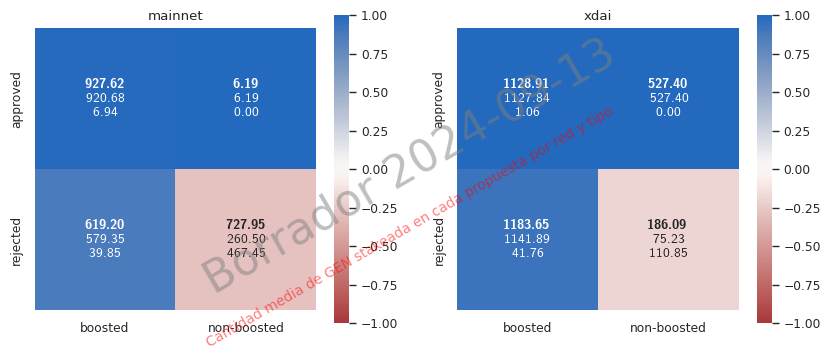

In [24]:
dfpr = utils.get_df('dfpr')
dfpr['upstake'] = dfpr['stakesFor']
dfpr['downstake'] = dfpr['stakesAgainst'] - dfpr['daostake']
dfpr['genMovilized'] = dfpr['stakesFor'] + dfpr['stakesAgainst'] - dfpr['daostake']
assert (dfpr['genMovilized'] >= 0).all()

# display(dfpr)
print(dfpr.columns)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
fig.suptitle("Cantidad media de GEN stakeada en cada propuesta por red y tipo")
# fig.supxlabel("Red")

for i, n in enumerate(['mainnet', 'xdai']):    
    dfprn = dfpr[dfpr['network'] == n]
    
    # ct = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['genMovilized'], aggfunc='mean').sort_index(ascending=False).sort_index(axis=1, ascending=False)
    ctup = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['upstake'], aggfunc='mean').sort_index(ascending=False).sort_index(axis=1, ascending=False).to_numpy()
    ctdown = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['downstake'], aggfunc='mean').sort_index(ascending=False).sort_index(axis=1, ascending=False).to_numpy()
    # Hay que convertirlo a float porque es un Float
    ctup = ctup.astype(float)
    ctdown = ctdown.astype(float)
    # ct = ct.astype('float')
    
    vlabel = np.vectorize(lambda up, down: f'\\textbf{{{up+down:.2f}}}\n {up:.2f}\n{down:.2f}')
    ct = (ctup - ctdown)/(ctup + ctdown)
        
    display(vlabel(ctup, ctdown))
    display(ct)
    # total = ct.sum().sum()
    
    sns.heatmap(ct, 
                annot=vlabel(ctup, ctdown), fmt='', 
                ax=axs[i], 
                square=True, 
                # cmap=utils.plot.default_heatmap_cmap, 
                vmin=-1, vmax=1,
                cmap='vlag_r',
                xticklabels=['boosted', 'non-boosted'],
                yticklabels=['approved', 'rejected'],
                annot_kws={'usetex': True}
               )
    axs[i].set_title(n)
    
    if i != 0:
        axs[i].set_ylabel("")
        
utils.plot.save_fig(fig, 'proposals/average_staking_div_colors.png')

## Confianza media de las propuestas por tipo

Index(['network', 'id', 'proposer', 'stage', 'createdAt', 'preBoostedAt',
       'boostedAt', 'quietEndingPeriodBeganAt', 'closingAt',
       'preBoostedClosingAt', 'executedAt', 'totalRepWhenExecuted',
       'totalRepWhenCreated', 'executionState', 'expiresInQueueAt', 'votesFor',
       'votesAgainst', 'winningOutcome', 'stakesFor', 'stakesAgainst', 'title',
       'description', 'url', 'confidence', 'confidenceThreshold',
       'queuedVoteRequiredPercentage', 'queuedVotePeriodLimit',
       'boostedVotePeriodLimit', 'thresholdConst', 'minimumDaoBounty',
       'daoBountyConst', 'dao', 'competitionId', 'name', 'group',
       'originalName', 'votesForPct', 'votesAgainstPct', 'executedAtMonth',
       'createdAtMonth', 'daoRegister', 'nvoters', 'daostake', 'nstakers',
       'internalDAO', 'isProposer', 'stakes', 'boosted', 'approved'],
      dtype='object')


array([['\\textbf{4.00}\n 600.00\n150.00', '\\textbf{0.00}\n 0.00\n0.00'],
       ['\\textbf{2.68}\n 402.50\n150.00',
        '\\textbf{0.00}\n 0.00\n150.00']], dtype='<U28')

array([['\\textbf{4.50}\n 900.00\n200.00',
        '\\textbf{1.00}\n 200.50\n200.00'],
       ['\\textbf{3.50}\n 700.10\n200.00',
        '\\textbf{0.00}\n 0.00\n200.00']], dtype='<U28')

saving to ../logseq/assets/nb_figures/proposals/average_confidence.png
Figure is Figure
Use ![Confianza media en cada propuesta por red y tipo](../assets/nb_figures/proposals/average_confidence.png) to embed it in logseq


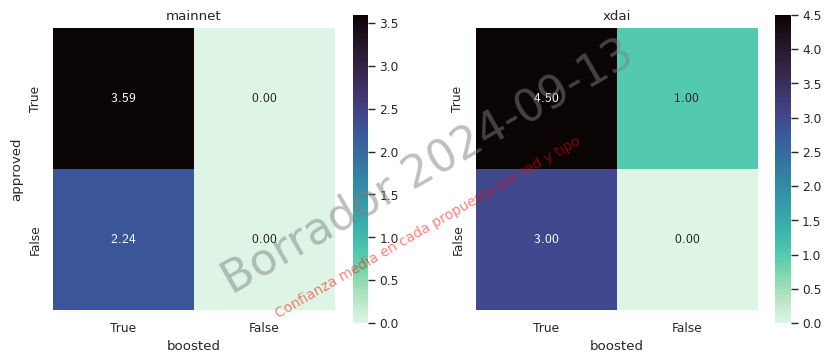

In [25]:
dfpr = utils.get_df('dfpr')

# display(dfpr)
print(dfpr.columns)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
fig.suptitle("Confianza media en cada propuesta por red y tipo")
# fig.supxlabel("Red")

for i, n in enumerate(['mainnet', 'xdai']):    
    dfprn = dfpr[dfpr['network'] == n]
    
    ct = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['confidence'], aggfunc='median').sort_index(ascending=False).sort_index(axis=1, ascending=False)
    ctup = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['stakesFor'], aggfunc='median').sort_index(ascending=False).sort_index(axis=1, ascending=False).to_numpy()
    ctdown = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['stakesAgainst'], aggfunc='median').sort_index(ascending=False).sort_index(axis=1, ascending=False).to_numpy()
    # Hay que convertirlo a float porque es un Float
    ct = ct.astype('float')
    
    vlabel = np.vectorize(lambda up, down: f'\\textbf{{{up/down:.2f}}}\n {up:.2f}\n{down:.2f}')
        
    display(vlabel(ctup, ctdown))
    # total = ct.sum().sum()
    
    sns.heatmap(ct, 
                # annot=vlabel(ctup, ctdown), fmt='', 
                annot=True, fmt='.2f',
                ax=axs[i], square=True, 
                cmap=utils.plot.default_heatmap_cmap, 
                annot_kws={'usetex': True}
                )
    axs[i].set_title(n)
    
    if i != 0:
        axs[i].set_ylabel("")
        
utils.plot.save_fig(fig, 'proposals/average_confidence.png')

## Confianza binaria por tipo

La "confianza binaria" vendría a ser algo así como "1" si han tenido más stake a favor que en contra y 0 eoc

El campo de `dfpr` sería `stakes`

aka  ¿Cuantas propuestas existen de cada tipo que hayan tenido más VP a favor que en contra?

array([[ 1.        ,  0.08375635],
       [ 1.        , -0.04195804]])

array([[1.        , 0.53333333],
       [1.        , 0.09375   ]])

saving to ../logseq/assets/nb_figures/proposals/bin_confidence.png
Figure is Figure
Use ![Número de propuestas con stake > downstake por tipo](../assets/nb_figures/proposals/bin_confidence.png) to embed it in logseq


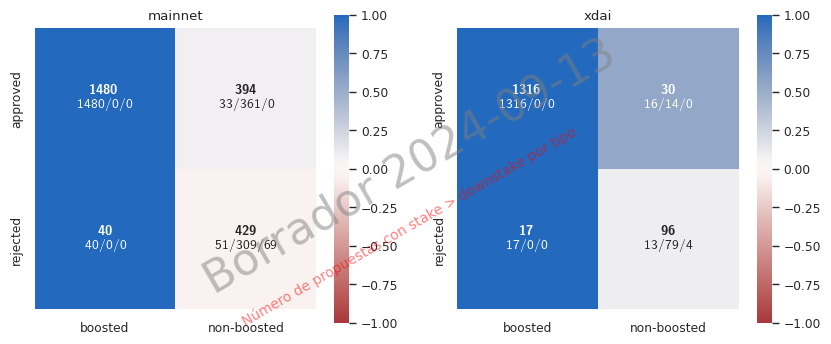

In [26]:
dfpr = utils.get_df('dfpr')

dfpr['stakesForGtAgainst'] = dfpr['stakesFor'] > dfpr['stakesAgainst'] - dfpr['daostake']
dfpr['stakesForEqAgainst'] = dfpr['stakesFor'] == dfpr['stakesAgainst'] - dfpr['daostake']
dfpr['stakesForLtAgainst'] = dfpr['stakesFor'] < dfpr['stakesAgainst'] - dfpr['daostake']

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
fig.suptitle("Número de propuestas con stake > downstake por tipo")
# fig.supxlabel("Red")

for i, n in enumerate(['mainnet', 'xdai']):    
    dfprn = dfpr[dfpr['network'] == n]
    
    # ct = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['genMovilized'], aggfunc='mean').sort_index(ascending=False).sort_index(axis=1, ascending=False)
    ctgt = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['stakesForGtAgainst'], aggfunc='sum').sort_index(ascending=False).sort_index(axis=1, ascending=False).to_numpy()
    cteq = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['stakesForEqAgainst'], aggfunc='sum').sort_index(ascending=False).sort_index(axis=1, ascending=False).to_numpy()
    ctlt = pd.crosstab(dfprn['approved'], dfprn['boosted'], values=dfprn['stakesForLtAgainst'], aggfunc='sum').sort_index(ascending=False).sort_index(axis=1, ascending=False).to_numpy()
    # Hay que convertirlo a float porque es un Float
    ctgt = ctgt.astype('float')
    cteq = cteq.astype('float')
    ctlt = ctlt.astype('float')
    # ct = ct.astype('float')
    
    vlabel = np.vectorize(lambda up, eq, down: f'\\textbf{{{up+eq+down:.0f}}}\n {up:.0f}/{eq:.0f}/{down:.0f}')
    ct = (ctgt-ctlt)/(ctgt + cteq + ctlt)
    display(ct)

    # display(ct)  
    # total = ct.sum().sum()
    
    sns.heatmap(ct, 
                annot=vlabel(ctgt, cteq, ctlt), fmt='', 
                ax=axs[i], 
                square=True, 
                # cmap=utils.plot.default_heatmap_cmap, 
                vmin=-1, vmax=1,
                cmap='vlag_r',
                xticklabels=['boosted', 'non-boosted'],
                yticklabels=['approved', 'rejected'],
                annot_kws={'usetex': True}
               )
    axs[i].set_title(n)
    
    if i != 0:
        axs[i].set_ylabel("")
        
utils.plot.save_fig(fig, 'proposals/bin_confidence.png')

## ¿Cuales han sido las propuestas más votadas?

In [27]:
dfp['nvoters'].describe(percentiles=[.5,.75,.95,.99])

count    3967.000000
mean        3.380388
std         3.466393
min         0.000000
50%         2.000000
75%         4.000000
95%         9.000000
99%        19.000000
max        38.000000
Name: nvoters, dtype: float64

In [28]:
with pd.option_context('display.max_colwidth', None):
    display(dfp.sort_values('nvoters', ascending=False).head(10)[['network', 'name', 'createdAt', 'boostedAt', 'nvoters', 'votesForPct', 'votesAgainstPct', 'title', 'description']])

network           name           createdAt           boostedAt  nvoters  \
1240  mainnet  Genesis Alpha 2019-12-03 22:00:45 2019-12-05 14:53:11       38   
3947     xdai         xDXdao 2022-09-03 18:17:55 2022-09-04 21:21:40       37   
3447     xdai         xDXdao 2021-10-25 15:04:33 2021-10-26 15:52:40       35   
631   mainnet  Genesis Alpha 2019-10-01 23:03:12                 NaT       33   
3077     xdai         xDXdao 2021-11-19 14:05:05 2021-11-20 18:27:35       31   
3895     xdai         xDXdao 2021-10-25 15:08:55 2021-10-26 15:53:55       30   
2834     xdai         xDXdao 2022-03-21 21:52:00 2022-03-22 23:50:20       29   
114   mainnet          dxDAO 2023-04-05 13:21:11 2023-04-07 15:36:11       28   
3819     xdai         xDXdao 2022-03-21 23:37:35 2022-03-22 23:55:25       28   
2492     xdai         xDXdao 2021-10-25 15:21:25 2021-10-26 16:02:30       25   

     votesForPct votesAgainstPct  \
1240    0.148197        0.123463   
3947    0.401488        0.224262   
3447    0.500485             0.0   
631     0.130077        0.115377   
3077    0.521843             0.0   
3895    0.503258             0.0   
2834    0.506224             0.0   
114     0.517512             0.0   
3819    0.504561             0.0   
2492     0.51182             0.0   

                                                      title  \
1240              Alchemy Moon (Alchemy Earth's Mobile App)   
3947           AugustoL Contributor Work Proposal #6 Payout   
3447                RICE/WETH Epoch 2 SWPR farming campaign   
631   social consensus: ALL members identified by real name   
3077                             Final answer (Carrot test)   
3895                SWPR/XDAI Epoch 2 SWPR farming campaign   
2834                            HND / XDAI farming campaign   
114                        Register Closure Multisig Scheme   
3819    Send HNDXDAI TVL Carrot to Liquidity mining relayer   
2492                HAUS/WETH Epoch 2 SWPR farming campaign   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

# Scatter plot votos vs GEN

- % votos en la opción mayoritaria vs % GEN en la opción mayoritaria

> ¿% gen? ¿Cómo sacamos el % de GEN? ¿No será la "cantidad total"?
> De momento lo haré con cantidad total

> O tal vez tenga sentido el Confidence (ratio For/Against)

In [29]:
dfp['votesMajPct'] = dfp['votesForPct'].where(dfp['winningOutcome'] == 'Pass', dfp['votesAgainstPct'])
dfp['stakesMaj'] = dfp['stakesFor'].where(dfp['winningOutcome'] == 'Pass', dfp['stakesAgainst'])

_dfp = dfp[(dfp['votesMajPct'] > 0.0001) & (dfp['votesMajPct'] < 1)]

fig = px.scatter(_dfp.sort_values('name'), x='votesMajPct', y='stakesMaj', color='name', symbol='winningOutcome', log_y=True, opacity=0.3,)
fig.update_traces(marker_size=6)

# Scatter plot pct de votos a favor vs. numero de votos

In [30]:
palette = sns.color_palette('Paired')
palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

Default fig size: (6.4, 4.8) ratio: 1.3333333333333335
Index(['network', 'id', 'proposer', 'stage', 'createdAt', 'preBoostedAt',
       'boostedAt', 'quietEndingPeriodBeganAt', 'closingAt',
       'preBoostedClosingAt', 'executedAt', 'totalRepWhenExecuted',
       'totalRepWhenCreated', 'executionState', 'expiresInQueueAt', 'votesFor',
       'votesAgainst', 'winningOutcome', 'stakesFor', 'stakesAgainst', 'title',
       'description', 'url', 'confidence', 'confidenceThreshold',
       'queuedVoteRequiredPercentage', 'queuedVotePeriodLimit',
       'boostedVotePeriodLimit', 'thresholdConst', 'minimumDaoBounty',
       'daoBountyConst', 'dao', 'competitionId', 'name', 'group',
       'originalName', 'votesForPct', 'votesAgainstPct', 'executedAtMonth',
       'createdAtMonth', 'daoRegister', 'nvoters', 'daostake', 'nstakers',
       'internalDAO', 'isProposer', 'stakes', 'boosted', 'approved', 'hnusers',
       'daoName'],
      dtype='object')
The _YLIM=20 has cut 14 proposals (0.69%)
[

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

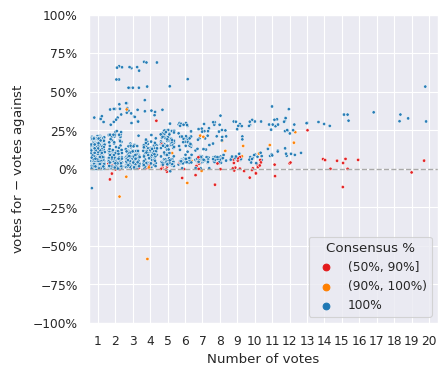

In [78]:
import matplotlib.ticker as mtick
sns.set_context('paper')

w,h = plt.rcParams['figure.figsize']
print("Default fig size:", (w,h), "ratio:", w/h)

_YLIM = 20
BIN_0 = 0.9
BIN_1 = 0.999999999

dfpr = utils.get_df('dfpr').merge(dfd, on=['network', 'dao'])
print(dfpr.columns)

assert not any(dfpr['executedAt'].isna())
assert dt.datetime(2021,5,31, 23, 59) < dt.datetime(2021,6,1)
assert dt.datetime(2021,6,1,0,1) > dt.datetime(2021,6,1)

DATE = utils.DEGRADATION_DATE
dfpr = dfpr[dfpr['executedAt'] < DATE]
dfpr = dfpr[(dfpr['votesForPct'] + dfpr['votesAgainstPct']) > 0]

_aux = dfpr['nvoters'] > _YLIM
print(f"The _YLIM={_YLIM} has cut {_aux.sum()} proposals ({_aux.mean()*100:.2f}%)")

dfpr['nvoters_jitter'] = dfpr['nvoters'] + np.random.uniform(-.4, .4, size=len(dfpr))
dfpr['nvotersPct'] = dfpr['nvoters'] / dfpr['hnusers']
dfpr['totalVotesPct'] = dfpr['votesForPct'] + dfpr['votesAgainstPct']
dfpr['absConfidence'] = dfpr['votesForPct'] - dfpr['votesAgainstPct']
dfpr['unanimity'] = dfpr[['votesForPct', 'votesAgainstPct']].max(axis=1) / dfpr['totalVotesPct']

_bins = [0.5, BIN_0, BIN_1, 1]
# _labels = [ f'({a*100:.0f}%, {b*100:.0f}%]' for a,b in zip(_bins, _bins[1:]) ]
_labels = [
    f'(50%, {BIN_0*100:.0f}%]',
    f'({BIN_0*100:.0f}%, 100%)',
    '100%',
]
print(_labels)
dfpr['unanimity_disc'] = pd.cut(
    dfpr['unanimity'],
    bins=_bins,
    labels=_labels
)

plt.subplots(figsize=(4.5, 4))
plt.axhline(0, color='darkgray', linestyle='--', linewidth=1)
_paired = sns.color_palette('Paired')
display(_paired)
_palette = [
    # Disenso: Orange
    _paired[5],
    # Light blue
    _paired[7],
    # Unanimity Dark blue
    _paired[1],
    # sns.color_palette('dark')[0],
]

fig = sns.scatterplot(
    dfpr[dfpr['boosted']], 
    y='absConfidence',
    x='nvoters_jitter', 
    # x='nvotersPct',
    hue='unanimity_disc', 
    style='approved', 
    alpha=.95,
    # style_order=[True, False],
    # markers=['X', '.'],
    markers=['.', '.'],
    palette=_palette,
    marker='.',
)
# plt.title('Props boosteadas')

# X axis style
plt.xlim(0.5,_YLIM+0.5)
plt.xticks(range(1,_YLIM+1))
plt.xlabel('Number of votes')

# Y axis style
plt.ylim(-1, 1)
plt.ylabel('votes for $-$ votes against')
fig.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Get current handles and labels
handles, labels = fig.get_legend_handles_labels()

# Separate hue and style legend handles/labels
hue_handles = [handle for handle, label in zip(handles, labels) if '%' in label]
hue_labels = [label for label in labels if '%' in label]

# Only add hue legend
fig.legend(handles=hue_handles, labels=hue_labels, title="Consensus %", loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

for ext in ['png', 'svg', 'pdf']:
    plt.savefig('../logseq/assets/nb_figures/proposals/scatter_unanimity_boosted.'+ext, bbox_inches='tight')

La idea es mostrar en un gráfico como se usa el consenso holográfico dependiendo del numero de usuarios que voten. He ploteado en el eje y la "confianza" en una propuesta, es decir, los votos a favor menos en contra. Si está por encima de 0.5, es que más del 50% están a favor, y es aceptada. Si es boosteada vale con que sea positivo. Y si es negativo es que hay más votos en contra que a favor. Luego además lo coloreo con la "confianza relativa", que es básicamente cuanta gente está de acuerdo.

absConfidence: votesFor - votesAgainst
relConfidence: max(votesFor, votesAgainst) / (votesFor+votesAgainst)

Con este gráfico que muestra SOLO las propuestas BOOSTEADAS, en general la absConfidence es muy baja porque al estar boosteadas conque esté por encima de 0 ya vale. Además, la relConfidence es muy roja, es decir, que "no hay peleas". Lo que destacaría de este gráfico es que hay propuestas que están peligrosamente cerca del 0 de relConfidence pero que son aprobadas porque ni si quiera son discutidas, ¿es esto sano? De hecho a la derecha vemos unas cuantas azules que son aprobadas "por los pelos" y que a penas se diferencian de las que no son aprobadas...

Text(0.5, 1.0, 'Propuestas no boosteadas')

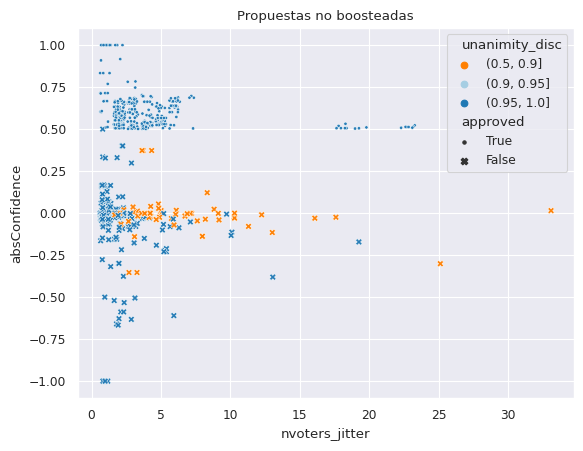

In [32]:
sns.scatterplot(
    dfpr[~dfpr['boosted']], 
    y='absConfidence',
    x='nvoters_jitter', 
    hue='unanimity_disc', 
    style='approved', 
    alpha=.95,
    style_order=[True, False], 
    markers=['.', 'X'],
    palette=_palette,
    marker='.',
)
plt.title('Propuestas no boosteadas')

Por otro lado, en las no boosteadas, las que no son aprobadas o bien no tienen mucha confianza (son azulitas), o bien tienen muy pocos votantes (están a la izquierda), por lo que parece que funciona bien como filtro. Otra cosa a destacar es que es evidente que la gente deja de votar en cuanto llega al 0.5.